# Decision Tree Classifier

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Decision Tree model from SKLearn
from sklearn import tree
from sklearn.tree import export_text
import graphviz

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,  roc_auc_score


In [105]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Classification Measures

Precision
$$ p=\frac{tp}{tp+fp} $$

Recall
$$ r=\frac{tp}{tp+fn} $$

$$ F_{1} Score = 2 \times \frac{p \times r}{p + r} $$

Load the long and short census data sets. We'll work with the long_census set first.

In [106]:
long_census = pd.read_csv('adult_census/final_data_set.csv')
short_census = pd.read_csv('adult_census/short_census.csv')

In [116]:
long_census['salary'].replace(0,"<=50K", inplace=True)
long_census['salary'].replace(1,">50K", inplace=True)

In [117]:
X = long_census.iloc[:,5:107]
y = long_census['salary']

In [118]:
X.head()

,federal_gov,local_gov,never_worked,private,self_emp_inc,self_emp_not_inc,state_gov,unknown,without_pay,10th,...,puerto_rico,scotland,south,taiwan,thailand,trinadad&tobago,united_states,unknown.2,vietnam,yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

Create and fit the model

In [167]:
clf = tree.DecisionTreeClassifier(min_samples_split=20,max_depth=3)
clf = clf.fit(X_train, y_train)

Make the predictions.

In [168]:
y_pred = clf.predict(X_test)

In [169]:
accuracy_score(y_pred, y_test)*100

81.72884999232305

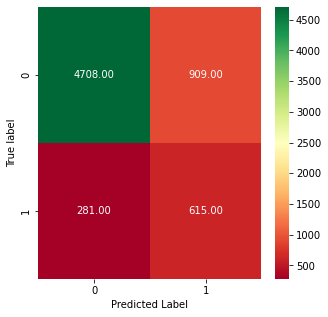

In [170]:
plot_cm(y_pred, y_test)

In [171]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       <=50K       0.94      0.84      0.89      5617
        >50K       0.40      0.69      0.51       896

    accuracy                           0.82      6513
   macro avg       0.67      0.76      0.70      6513
weighted avg       0.87      0.82      0.84      6513



In [172]:
class_names = ('Low Salary','High Salary')

In [173]:
X.columns

Index(['federal_gov', 'local_gov', 'never_worked', 'private', 'self_emp_inc',
       'self_emp_not_inc', 'state_gov', 'unknown', 'without_pay', '10th',
       ...
       'puerto_rico', 'scotland', 'south', 'taiwan', 'thailand',
       'trinadad&tobago', 'united_states', 'unknown.2', 'vietnam',
       'yugoslavia'],
      dtype='object', length=102)

In [183]:
r = export_text(clf)

In [185]:
#print(r)

In [182]:
#tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                label='none',
                                special_characters=True,
                                proportion=True,
                                rotate=True)
graph = graphviz.Source(dot_data)
graph.render("census")

'census.pdf'

## LandSat Data

In [274]:
land_train = pd.read_csv('landsat_train.csv')
land_test = pd.read_csv('landsat_test.csv')

In [244]:
land_train.land_type.replace(1,'red soil', inplace=True)
land_train.land_type.replace(2, 'cotton crop', inplace=True) 
land_train.land_type.replace(3, 'grey soil', inplace=True)
land_train.land_type.replace(4, 'damp grey soil', inplace=True)
land_train.land_type.replace(5, 'soil with vegetation stubble', inplace=True) 
land_train.land_type.replace(6, 'mixture class (all types present)', inplace=True)
land_train.land_type.replace(7, 'very damp grey soil NB', inplace=True)

In [245]:
land_test.land_type.replace(1,'red soil', inplace=True)
land_test.land_type.replace(2, 'cotton crop', inplace=True) 
land_test.land_type.replace(3, 'grey soil', inplace=True)
land_test.land_type.replace(4, 'damp grey soil', inplace=True)
land_test.land_type.replace(5, 'soil with vegetation stubble', inplace=True) 
land_test.land_type.replace(6, 'mixture class (all types present)', inplace=True)
land_test.land_type.replace(7, 'very damp grey soil NB', inplace=True)

In [275]:
class_names = ['red soil', 'cotton_crop', 'grey soil','damp grey soil',
               'soil with veg stubble','very dampy grey soil']

In [276]:
land_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [277]:
X_train = land_train.iloc[:,0:36]
y_train = land_train.iloc[:,36:37]

X_test = land_test.iloc[:,0:36]
y_test = land_test.iloc[:,36:37]

In [278]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(X_train, y_train)

In [279]:
y_pred = clf.predict(X_test)

In [280]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.95      0.93      0.94       473
           2       0.96      0.90      0.92       239
           3       0.91      0.86      0.88       419
           4       0.55      0.59      0.57       194
           5       0.72      0.76      0.74       224
           7       0.80      0.83      0.81       451

    accuracy                           0.84      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000



In [281]:
#tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                label='none',
                                special_characters=True,
                                proportion=True,
                                rotate=True)
graph = graphviz.Source(dot_data)
graph.render("landsat_all_pixels")

'landsat_all_pixels.pdf'

In [282]:
land_train = land_train[['central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2','land_type']]
land_test = land_test[['central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2','land_type']]

In [283]:
X_train = land_train.iloc[:,0:4]
y_train = land_train.iloc[:,4:5]

X_test = land_test.iloc[:,0:4]
y_test = land_test.iloc[:,4:5]

In [284]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [285]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.88      0.85      0.87       476
           2       0.91      0.96      0.93       212
           3       0.91      0.86      0.88       424
           4       0.36      0.37      0.36       208
           5       0.57      0.96      0.71       141
           7       0.82      0.72      0.77       539

    accuracy                           0.79      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.80      0.79      0.79      2000



In [286]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,
                                class_names=class_names,
                                filled=True, 
                                rounded=True,
                                label='all',
                                special_characters=True,
                                proportion=True,
                                rotate=True)
graph = graphviz.Source(dot_data)
graph.render("landsat_central_pixel")

'landsat_central_pixel.pdf'